### 네이버 메뉴 호출
- 방법 : 크롬 개발자 도구 이용
- 전체 소스코드에서 위치 찾아(화면 해당 컨텐츠에서 단축메뉴 검사 이용)
- 태그 확인하고 태그 추출
- 동일 태그가 여러개인 경우 class속성 이용해서 추출

In [1]:
from urllib.request import urlopen
import bs4

In [12]:
url = "https://www.naver.com"

# url에 접속

html = urlopen(url)
type(html)

http.client.HTTPResponse


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
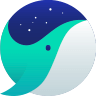
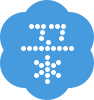

In [13]:
# 파서에 등록해 obj로 변환
bs_obj = bs4.BeautifulSoup(html,"html.parser")
bs_obj

In [14]:
# 첫번째 메뉴 블럭 파싱 (ul class: list_nav type_fix)
ul = bs_obj.find("ul",{"class":"list_nav type_fix"})
# print(type(ul))
print(ul)
## 위에 추출한 ul객체는 bs4.element.Tag임
## 집합적 자료의 속성을 갖고 있기 때문에 반복 요소로 사용 가능

for li in ul:
    print(li)

<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
<

In [15]:
# findAll 함수 사용해서 ul안의 모든 li를 추출
lis = ul.findAll("li")
print(lis)

[<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>, <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>, <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>, <li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>, <li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>, <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>, <li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>]


In [16]:
# 각 li태그 내부의 a 태그 접근 후 text 출력
for li in lis:
    a_tag = li.find("a")
    print(a_tag.text,end=",")

메일,카페,블로그,지식iN,쇼핑,쇼핑LIVE,Pay,TV,

In [17]:
ul1 = bs_obj.find("ul",{"class":"list_nav NM_FAVORITE_LIST"})
# ul1
lis = ul1.findAll("li")
for li in lis:
    a_tag=li.find("a")
    print(a_tag.text,end=",")

사전,뉴스,증권,부동산,지도,VIBE,책,웹툰,

#### 네이버 뉴스 크롤링

In [2]:
url = "https://news.naver.com/"
html = urlopen(url) #RemoteDisconnected
# 프로그램을 통해 자동화된 bot으로 생각하고 연결을 끊어버림

RemoteDisconnected: Remote end closed connection without response

- 위 코드 처럼 자동화 봇으로 보고 연결을 끊는 경우에는 데이터 전송시 추가되는 header를 구성해 bot이 아님을 증명해야 함
    - header에는 브라우저를 통한 접속이라는 정보를 포함시킨다
    - 크롬 개발자도구 => NetWork => new.naver.com 선택한 후 오른쪽에 새로나타나는 창에서 header 선택
    - requests headers 목록에서 user-agent 확인
- https://developers.whatismybrowser.com/useragents/explore/software_name/chrome/

In [3]:
# header 전송은 보통 requests 객체를 사용함
import requests

headers = {"user-Agent":"Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"
}

url = "https://news.naver.com/"
res = requests.get(url,headers=headers)
html = res.text
html[:100]

'\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\n\t\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equ'

In [4]:
# bs4 객체 변환
bs_obj = bs4.BeautifulSoup(html,"html.parser")
bs_obj


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="http://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>
<meta content=

In [5]:
# 헤드라인 뉴스의 구성 ul, class : hdline_article_list
news_list = bs_obj.find("ul", {"class":"hdline_article_list"})
# news_list

# 모든 li 추출
lis = news_list.findAll("li")

# 뉴스 제목 출력
for li in lis:
    a_tag = li.find("a")
    print(a_tag.text.strip())

윤석열, 최재형, 홍준표 오늘 이준석 대표 안만난다
추악한 성추행 피해 11명…추락한 대선후보 쿠오모
文 “한·미훈련 美와 신중 협의”… 범여(汎與) 의원 60명 ‘연기 연판장’
닷새 동안 팔린 김밥 4,200여 줄…130명 넘게 식중독
교육부, 4단계에도 등교 검토…9일 등교 방침 발표


In [38]:
# 관련기사 링크 list에 저장
link_list=[]
for li in lis:
    a_tag = li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)

['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=079&aid=0003537511', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=087&aid=0000854868', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=003&aid=0010647064', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=119&aid=0002517584', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=469&aid=0000621781']


#### 연습문제
- 네이버 뉴스 메인페이지의 5개 섹션의 헤드라인 기사의 타이틀과 링크주소를 수집해서 df로 작성

In [33]:
import pandas as pd

In [6]:
import requests

headers ={"User-Agent" : 
          "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}

url = "https://news.naver.com/"
res = requests.get(url,headers=headers)
bs_obj = bs4.BeautifulSoup(html,"html.parser")


In [17]:
# 수집 데이터 저장할 list
title_list = []
link_list= []
section_list = []

sections = ["헤드라인","정치", "경제", "사회", "생활/문화", "세계", "IT/과학"]
# 7개 섹션 기사를 모두 담고 있는 영역 : div id = main_content 추출
main_cont = bs_obj.find(id = "main_content")
uls = main_cont.findAll("ul")
len(uls)

# main_cont > 섹션별 ul태그 > 각 ul마다 5개씩의 li태그 > li태그의 a를 추출

for k in range(len(uls)): # 각 ul의 index값 : k변수에 저장 (0-6)
    lis = uls[k].findAll("li") # 한개의 ul 태그 내 모든 li 태그를 추출
    for li in lis:
        a_tag = li.find("a")
        title_list.append(a_tag.text.strip())
        if(k<1):
            link_list.append('https://news.naver.com'+a_tag["href"])
        else:
            link_list.append(a_tag["href"])
        section_list.append(sections[k])

In [18]:
import pandas as pd
col_dict={"section":section_list,"news_title":title_list,"link_url":link_list}
news_df = pd.DataFrame(col_dict)
news_df

,section,news_title,link_url
0,헤드라인,"윤석열, 최재형, 홍준표 오늘 이준석 대표 안만난다",https://news.naver.com/main/read.naver?mode=LS...
1,헤드라인,추악한 성추행 피해 11명…추락한 대선후보 쿠오모,https://news.naver.com/main/read.naver?mode=LS...
2,헤드라인,文 “한·미훈련 美와 신중 협의”… 범여(汎與) 의원 60명 ‘연기 연판장’,https://news.naver.com/main/read.naver?mode=LS...
3,헤드라인,"닷새 동안 팔린 김밥 4,200여 줄…130명 넘게 식중독",https://news.naver.com/main/read.naver?mode=LS...
4,헤드라인,"교육부, 4단계에도 등교 검토…9일 등교 방침 발표",https://news.naver.com/main/read.naver?mode=LS...
5,정치,"[최강시사] 이준석 “안철수 ‘전범’ 운운, 정상적인 정치 지도자 간 대화 아냐”",https://news.naver.com/main/read.naver?mode=LS...
6,정치,"사흘간 영남 찾는 최재형, 월성 원전도 방문…윤석열, 나흘간 휴가",https://news.naver.com/main/read.naver?mode=LS...
7,정치,"김근식 “이재명, 음주운전 공격받자 김연경 끌어들여”",https://news.naver.com/main/read.naver?mode=LS...
8,정치,"이준석 ""안철수, 그냥 내가 싫은 거 아닌가?""",https://news.naver.com/main/read.naver?mode=LS...
9,정치,"'도리도리 점검단'…윤석열, '쩍벌' 이어 또 셀프디스",https://news.naver.com/main/read.naver?mode=LS...


In [20]:
news_df.to_csv("../crawl_data/naver_news.csv")